In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_excel(r'S:\HRV ML course\internship HR venture\production_data.xlsx')

In [4]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,Date,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,...,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-26 00:00:00,2019-01-27 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,production_1,65.13,65.67,50.77,48.67,49.56,48.17,48.97,...,50.05,29.02,48.1,50.04,49.41,49.27,50.2,49.15,49.35,49.61
3,NaN,NaN,production_2,25.1688,25.484,25.2276,28.4392,8.61306,0,0,...,24.551,13.8133,24.8437,25.9892,25.4427,25.2939,25.8354,25.4552,25.8642,24.6286
4,NaN,NaN,production_3,49.8093,47.63,61.7886,63.3379,63.3593,62.4493,64.3886,...,62.53,13.8462,55.9893,62.9493,62.67,63.3593,63.58,63.4293,63.4193,62.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,production_1,47.06,44.22,45.92,45.29,48.41,52,51.03,...,52.8,52.84,53.56,52.68,52.37,50.91,53.22,53.43,52.89,49.37
124,NaN,NaN,production_2,30.4752,28.2641,29.6436,29.7074,27.2699,28.8394,29.411,...,24.5085,25.1913,25.4552,24.3297,22.954,23.8782,24.0783,23.4092,23.4455,25.3052
125,NaN,NaN,production_3,68.3493,69.2293,65.8886,66.5072,64.5086,61.8086,62.0093,...,59.2951,59.2058,61.2451,62.513,62.9637,63.8565,62.2144,60.7665,62.7658,62.5986


# Exploratory Data Analysis

In [5]:
df.shape

(127, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   0 non-null      float64
 2   Unnamed: 2   60 non-null     object 
 3   Unnamed: 3   60 non-null     object 
 4   Unnamed: 4   60 non-null     object 
 5   Unnamed: 5   60 non-null     object 
 6   Unnamed: 6   60 non-null     object 
 7   Unnamed: 7   60 non-null     object 
 8   Unnamed: 8   60 non-null     object 
 9   Unnamed: 9   60 non-null     object 
 10  Unnamed: 10  60 non-null     object 
 11  Unnamed: 11  60 non-null     object 
 12  Unnamed: 12  60 non-null     object 
 13  Unnamed: 13  60 non-null     object 
 14  Unnamed: 14  60 non-null     object 
 15  Unnamed: 15  60 non-null     object 
 16  Unnamed: 16  60 non-null     object 
 17  Unnamed: 17  60 non-null     object 
 18  Unnamed: 18  60 non-null     object 
 19  Unnamed:

# Data Preprocessing

In [7]:
df= df.T
df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,Date,NaN,production_1,production_2,production_3,Total production (ton),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Date,NaN,production_1,production_2,production_3,Total production (ton)
Unnamed: 3,2019-01-01 00:00:00,NaN,65.13,25.1688,49.8093,114.939,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-01 00:00:00,NaN,47.06,30.4752,68.3493,115.409
Unnamed: 4,2019-01-02 00:00:00,NaN,65.67,25.484,47.63,113.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-02 00:00:00,NaN,44.22,28.2641,69.2293,113.449
Unnamed: 5,2019-01-03 00:00:00,NaN,50.77,25.2276,61.7886,112.559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-03 00:00:00,NaN,45.92,29.6436,65.8886,111.809
Unnamed: 6,2019-01-04 00:00:00,NaN,48.67,28.4392,63.3379,112.008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-04 00:00:00,NaN,45.29,29.7074,66.5072,111.797
Unnamed: 7,2019-01-05 00:00:00,NaN,49.56,8.61306,63.3593,112.919,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-05 00:00:00,NaN,48.41,27.2699,64.5086,112.919
Unnamed: 8,2019-01-06 00:00:00,NaN,48.17,0,62.4493,110.619,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-06 00:00:00,NaN,52,28.8394,61.8086,113.809
Unnamed: 9,2019-01-07 00:00:00,NaN,48.97,0,64.3886,113.359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,NaN,51.03,29.411,62.0093,113.039


In [8]:
df=df.drop(['Unnamed: 0', 'Unnamed: 1']) #dropping 1st two rows with all Nan values

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Unnamed: 2,Date,NaN,production_1,production_2,production_3,Total production (ton),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Date,NaN,production_1,production_2,production_3,Total production (ton)
Unnamed: 3,2019-01-01 00:00:00,NaN,65.13,25.1688,49.8093,114.939,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-01 00:00:00,NaN,47.06,30.4752,68.3493,115.409
Unnamed: 4,2019-01-02 00:00:00,NaN,65.67,25.484,47.63,113.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-02 00:00:00,NaN,44.22,28.2641,69.2293,113.449
Unnamed: 5,2019-01-03 00:00:00,NaN,50.77,25.2276,61.7886,112.559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-03 00:00:00,NaN,45.92,29.6436,65.8886,111.809
Unnamed: 6,2019-01-04 00:00:00,NaN,48.67,28.4392,63.3379,112.008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-04 00:00:00,NaN,45.29,29.7074,66.5072,111.797
Unnamed: 7,2019-01-05 00:00:00,NaN,49.56,8.61306,63.3593,112.919,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-05 00:00:00,NaN,48.41,27.2699,64.5086,112.919
Unnamed: 8,2019-01-06 00:00:00,NaN,48.17,0,62.4493,110.619,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-06 00:00:00,NaN,52,28.8394,61.8086,113.809
Unnamed: 9,2019-01-07 00:00:00,NaN,48.97,0,64.3886,113.359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,NaN,51.03,29.411,62.0093,113.039
Unnamed: 10,2019-01-08 00:00:00,NaN,48.83,0,64.94,113.77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-08 00:00:00,NaN,49.87,31.3832,64.08,113.95
Unnamed: 11,2019-01-09 00:00:00,NaN,50.76,0.834167,64.3586,115.119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,50.77,21.4845,63.5993,114.369


In [10]:
df.reset_index(drop=True, inplace=True) #reindexing with integers

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,Date,NaN,production_1,production_2,production_3,Total production (ton),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Date,NaN,production_1,production_2,production_3,Total production (ton)
1,2019-01-01 00:00:00,NaN,65.13,25.1688,49.8093,114.939,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-01 00:00:00,NaN,47.06,30.4752,68.3493,115.409
2,2019-01-02 00:00:00,NaN,65.67,25.484,47.63,113.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-02 00:00:00,NaN,44.22,28.2641,69.2293,113.449
3,2019-01-03 00:00:00,NaN,50.77,25.2276,61.7886,112.559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-03 00:00:00,NaN,45.92,29.6436,65.8886,111.809
4,2019-01-04 00:00:00,NaN,48.67,28.4392,63.3379,112.008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-04 00:00:00,NaN,45.29,29.7074,66.5072,111.797
5,2019-01-05 00:00:00,NaN,49.56,8.61306,63.3593,112.919,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-05 00:00:00,NaN,48.41,27.2699,64.5086,112.919
6,2019-01-06 00:00:00,NaN,48.17,0,62.4493,110.619,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-06 00:00:00,NaN,52,28.8394,61.8086,113.809
7,2019-01-07 00:00:00,NaN,48.97,0,64.3886,113.359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,NaN,51.03,29.411,62.0093,113.039
8,2019-01-08 00:00:00,NaN,48.83,0,64.94,113.77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-08 00:00:00,NaN,49.87,31.3832,64.08,113.95
9,2019-01-09 00:00:00,NaN,50.76,0.834167,64.3586,115.119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,50.77,21.4845,63.5993,114.369


In [12]:
df=df.dropna(axis=1, how='all') # dropping all columns with nan values
df=df.dropna(axis=0, how='all') #  dropping all columns with nan values

In [13]:
df.shape

(32, 60)

In [14]:
df.rename(columns=df.iloc[0],inplace=True) #changing the header according to the first row


In [15]:
df

,Date,production_1,production_2,production_3,Total production (ton),Date,production_1,production_2,production_3,Total production (ton),...,Date,production_1,production_2,production_3,Total production (ton),Date,production_1,production_2,production_3,Total production (ton)
0,Date,production_1,production_2,production_3,Total production (ton),Date,production_1,production_2,production_3,Total production (ton),...,Date,production_1,production_2,production_3,Total production (ton),Date,production_1,production_2,production_3,Total production (ton)
1,2019-01-01 00:00:00,65.13,25.1688,49.8093,114.939,2019-02-01 00:00:00,50.11,24.6261,63.48,113.59,...,2019-11-01 00:00:00,36.84,0.427714,64.7151,101.555,2019-12-01 00:00:00,47.06,30.4752,68.3493,115.409
2,2019-01-02 00:00:00,65.67,25.484,47.63,113.3,2019-02-02 00:00:00,49.87,25.0325,63.3486,113.219,...,2019-11-02 00:00:00,29.76,0.0762881,65.48,95.24,2019-12-02 00:00:00,44.22,28.2641,69.2293,113.449
3,2019-01-03 00:00:00,50.77,25.2276,61.7886,112.559,2019-02-03 00:00:00,49.29,27.5263,62.5479,111.838,...,2019-11-03 00:00:00,42.77,0,63.5051,106.275,2019-12-03 00:00:00,45.92,29.6436,65.8886,111.809
4,2019-01-04 00:00:00,48.67,28.4392,63.3379,112.008,2019-02-04 00:00:00,49.55,24.6911,62.24,111.79,...,2019-11-04 00:00:00,36.15,0.0475238,63.7153,99.8653,2019-12-04 00:00:00,45.29,29.7074,66.5072,111.797
5,2019-01-05 00:00:00,49.56,8.61306,63.3593,112.919,2019-02-05 00:00:00,16.27,8.19076,8.81762,25.0876,...,2019-11-05 00:00:00,36.21,0,63.8251,100.035,2019-12-05 00:00:00,48.41,27.2699,64.5086,112.919
6,2019-01-06 00:00:00,48.17,0,62.4493,110.619,2019-02-06 00:00:00,41.06,15.8478,16.4348,57.4948,...,2019-11-06 00:00:00,7.26,0,65.5465,72.8065,2019-12-06 00:00:00,52,28.8394,61.8086,113.809
7,2019-01-07 00:00:00,48.97,0,64.3886,113.359,2019-02-07 00:00:00,65.59,26.5958,46.8593,112.449,...,2019-11-07 00:00:00,46.89,6.58204,64.2693,111.159,2019-12-07 00:00:00,51.03,29.411,62.0093,113.039
8,2019-01-08 00:00:00,48.83,0,64.94,113.77,2019-02-08 00:00:00,64.8,26.8072,48.33,113.13,...,2019-11-08 00:00:00,45.97,16.8709,65.9493,111.919,2019-12-08 00:00:00,49.87,31.3832,64.08,113.95
9,2019-01-09 00:00:00,50.76,0.834167,64.3586,115.119,2019-02-09 00:00:00,65.33,27.2949,47.6486,112.979,...,2019-11-09 00:00:00,47.54,19.905,65.6593,113.199,2019-12-09 00:00:00,50.77,21.4845,63.5993,114.369


In [16]:
df2 = pd.DataFrame(columns=['Date', 'production_1', 'production_2','production_3','Total production (ton)']) #cerating another dataframe
df2

,Date,production_1,production_2,production_3,Total production (ton)


In [17]:
col=df.columns

for i in range(0,len(col),5):
    
    
    df2=pd.concat([df2,df.iloc[:,i:i+5]])

In [18]:
print(len(col))

60


In [19]:
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,Date,production_1,production_2,production_3,Total production (ton)
1,2019-01-01 00:00:00,65.13,25.1688,49.8093,114.939
2,2019-01-02 00:00:00,65.67,25.484,47.63,113.3
3,2019-01-03 00:00:00,50.77,25.2276,61.7886,112.559
4,2019-01-04 00:00:00,48.67,28.4392,63.3379,112.008
...,...,...,...,...,...
27,2019-12-27 00:00:00,50.91,23.8782,63.8565,114.767
28,2019-12-28 00:00:00,53.22,24.0783,62.2144,115.434
29,2019-12-29 00:00:00,53.43,23.4092,60.7665,114.196
30,2019-12-30 00:00:00,52.89,23.4455,62.7658,115.656


In [20]:
df2.drop(df2.index[0],inplace=True) #dropping the 1st row

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 1 to 31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    365 non-null    object
 1   production_1            365 non-null    object
 2   production_2            365 non-null    object
 3   production_3            365 non-null    object
 4   Total production (ton)  365 non-null    object
dtypes: object(5)
memory usage: 17.4+ KB


In [22]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [23]:
df2.Date=pd.to_datetime(df2.Date) 
df2

,Date,production_1,production_2,production_3,Total production (ton)
1,2019-01-01,65.13,25.1688,49.8093,114.939
2,2019-01-02,65.67,25.484,47.63,113.3
3,2019-01-03,50.77,25.2276,61.7886,112.559
4,2019-01-04,48.67,28.4392,63.3379,112.008
5,2019-01-05,49.56,8.61306,63.3593,112.919
...,...,...,...,...,...
27,2019-12-27,50.91,23.8782,63.8565,114.767
28,2019-12-28,53.22,24.0783,62.2144,115.434
29,2019-12-29,53.43,23.4092,60.7665,114.196
30,2019-12-30,52.89,23.4455,62.7658,115.656


In [24]:
index=list(range(0,372))
df2.index= index
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,2019-01-01,65.13,25.1688,49.8093,114.939
1,2019-01-02,65.67,25.484,47.63,113.3
2,2019-01-03,50.77,25.2276,61.7886,112.559
3,2019-01-04,48.67,28.4392,63.3379,112.008
4,2019-01-05,49.56,8.61306,63.3593,112.919
...,...,...,...,...,...
367,2019-12-27,50.91,23.8782,63.8565,114.767
368,2019-12-28,53.22,24.0783,62.2144,115.434
369,2019-12-29,53.43,23.4092,60.7665,114.196
370,2019-12-30,52.89,23.4455,62.7658,115.656


### converting the object type to float type

In [25]:
df2['production_1'] = df2['production_1'].astype(float)
df2['production_2'] = df2['production_2'].astype(float)
df2['production_3'] = df2['production_3'].astype(float)
df2['Total production (ton)'] = df2['Total production (ton)'].astype(float)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    365 non-null    datetime64[ns]
 1   production_1            365 non-null    float64       
 2   production_2            365 non-null    float64       
 3   production_3            365 non-null    float64       
 4   Total production (ton)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.4 KB


In [27]:
df2=df2.replace(np.nan,0) #replacing all the nan values with zeros

In [28]:
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,1.546301e+18,65.13,25.168834,49.8093,114.9393
1,1.546387e+18,65.67,25.483992,47.6300,113.3000
2,1.546474e+18,50.77,25.227614,61.7886,112.5586
3,1.546560e+18,48.67,28.439220,63.3379,112.0079
4,1.546646e+18,49.56,8.613057,63.3593,112.9193
...,...,...,...,...,...
367,1.577405e+18,50.91,23.878189,63.8565,114.7665
368,1.577491e+18,53.22,24.078289,62.2144,115.4344
369,1.577578e+18,53.43,23.409205,60.7665,114.1965
370,1.577664e+18,52.89,23.445473,62.7658,115.6558


### negative value removal

In [29]:
for cols in df2.columns.tolist()[1:4]:
    df2=df2.loc[df2[cols]>0]

In [30]:
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,1.546301e+18,65.13,25.168834,49.8093,114.9393
1,1.546387e+18,65.67,25.483992,47.6300,113.3000
2,1.546474e+18,50.77,25.227614,61.7886,112.5586
3,1.546560e+18,48.67,28.439220,63.3379,112.0079
4,1.546646e+18,49.56,8.613057,63.3593,112.9193
...,...,...,...,...,...
367,1.577405e+18,50.91,23.878189,63.8565,114.7665
368,1.577491e+18,53.22,24.078289,62.2144,115.4344
369,1.577578e+18,53.43,23.409205,60.7665,114.1965
370,1.577664e+18,52.89,23.445473,62.7658,115.6558


### fixing date-time format

In [31]:
df2.Date=pd.to_datetime(df2.Date)
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,2019-01-01,65.13,25.168834,49.8093,114.9393
1,2019-01-02,65.67,25.483992,47.6300,113.3000
2,2019-01-03,50.77,25.227614,61.7886,112.5586
3,2019-01-04,48.67,28.439220,63.3379,112.0079
4,2019-01-05,49.56,8.613057,63.3593,112.9193
...,...,...,...,...,...
367,2019-12-27,50.91,23.878189,63.8565,114.7665
368,2019-12-28,53.22,24.078289,62.2144,115.4344
369,2019-12-29,53.43,23.409205,60.7665,114.1965
370,2019-12-30,52.89,23.445473,62.7658,115.6558


### modifying the total production column with right values

In [32]:
df2['Total production (ton)']=df2['production_1']+ df2['production_2']+df2['production_3']

In [33]:
df2=df2.replace(np.nan,0) #replacing all the nan values with zeros

In [34]:
df2

,Date,production_1,production_2,production_3,Total production (ton)
0,2019-01-01,65.13,25.168834,49.8093,140.108134
1,2019-01-02,65.67,25.483992,47.6300,138.783992
2,2019-01-03,50.77,25.227614,61.7886,137.786214
3,2019-01-04,48.67,28.439220,63.3379,140.447120
4,2019-01-05,49.56,8.613057,63.3593,121.532357
...,...,...,...,...,...
367,2019-12-27,50.91,23.878189,63.8565,138.644689
368,2019-12-28,53.22,24.078289,62.2144,139.512689
369,2019-12-29,53.43,23.409205,60.7665,137.605705
370,2019-12-30,52.89,23.445473,62.7658,139.101273


In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### adding percentage of production 1,2&3

In [36]:

try:
    df2['production_1%']=df2['production_1']/df2['Total production (ton)']
    df2['production_2%']=df2['production_2']/df2['Total production (ton)']
    df2['production_3%']=df2['production_3']/df2['Total production (ton)']
except ZeroDivisionError:
    df2['production_1%']=0
    df2['production_2%']=0
    df2['production_3%']=0
    

In [37]:
df2=df2.replace(np.nan,0)

In [38]:
index=list(range(0,284))
df2.index= index
df2

,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%
0,2019-01-01,65.13,25.168834,49.809300,140.108134,0.464855,0.179639,0.355506
1,2019-01-02,65.67,25.483992,47.630000,138.783992,0.473181,0.183623,0.343195
2,2019-01-03,50.77,25.227614,61.788600,137.786214,0.368469,0.183092,0.448438
3,2019-01-04,48.67,28.439220,63.337900,140.447120,0.346536,0.202491,0.450973
4,2019-01-05,49.56,8.613057,63.359300,121.532357,0.407793,0.070870,0.521337
5,2019-01-09,50.76,0.834167,64.358600,115.952767,0.437764,0.007194,0.555042
6,2019-01-11,49.72,9.178339,65.609300,124.507639,0.399333,0.073717,0.526950
7,2019-01-12,49.97,27.171086,65.590000,142.731086,0.350099,0.190366,0.459535
8,2019-01-13,58.68,28.826913,55.458600,142.965513,0.410449,0.201635,0.387916
9,2019-01-14,65.48,28.410455,49.160000,143.050455,0.457741,0.198604,0.343655


# K-Means clustering with 3 features

In [39]:
#selecting features

X= df2.loc[:, ['production_1%','production_2%','production_3%']]
X.head()

,production_1%,production_2%,production_3%
0,0.464855,0.179639,0.355506
1,0.473181,0.183623,0.343195
2,0.368469,0.183092,0.448438
3,0.346536,0.202491,0.450973
4,0.407793,0.070870,0.521337


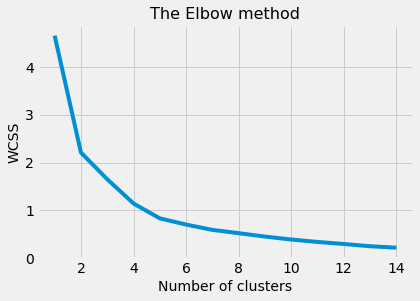

In [40]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,15):
    kmeans= KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")    
plt.plot(range(1,15),wcss)
plt.title('The Elbow method',fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS',fontsize=14)
plt.show()

In [41]:
kmeans= KMeans(5,random_state=18)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=18)

In [42]:
centroids= kmeans.cluster_centers_
centroids

array([[0.34518161, 0.19082427, 0.46399412],
       [0.37492558, 0.34772351, 0.27735092],
       [0.46933033, 0.19482537, 0.3358443 ],
       [0.42866866, 0.02519522, 0.54613612],
       [0.18228757, 0.2372898 , 0.58042263]])

In [43]:
kmeans.labels_

array([2, 2, 0, 0, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 4, 2, 2, 0, 0, 2, 1, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
df2_new= df2.copy()
df2_new['Clusters']= kmeans.labels_
df2_new.head()

,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%,Clusters
0,2019-01-01,65.13,25.168834,49.8093,140.108134,0.464855,0.179639,0.355506,2
1,2019-01-02,65.67,25.483992,47.6300,138.783992,0.473181,0.183623,0.343195,2
2,2019-01-03,50.77,25.227614,61.7886,137.786214,0.368469,0.183092,0.448438,0
3,2019-01-04,48.67,28.439220,63.3379,140.447120,0.346536,0.202491,0.450973,0
4,2019-01-05,49.56,8.613057,63.3593,121.532357,0.407793,0.070870,0.521337,3


In [45]:
df2_new.shape

(284, 9)

## Marking and removing the outliers

In [46]:
def distance(point1 , point2):
    dist = np.linalg.norm(point1 - point2)
    return dist

In [47]:
df2_new['outlier'] =0
out_df = pd.DataFrame()

In [48]:
for i in range(len(centroids)):
    dist_list = []
    data= df2_new[df2_new['Clusters']==i]
    for j in range(len(data)):
        point2= centroids[i]
        point1 = np.array(data.iloc[j].to_list()[5:-2])
        dist =  distance(point1 , point2)
        dist_list.append(dist)
    mean = np.array(dist_list).mean()
    std = np.array(dist_list).std()
    maxi =np.array(dist_list).max()
    mini = np.array(dist_list).min()
    print('for cluster {}'.format(i))
    
    print('mean :{}|std :{}|maxi:{}|mini:{}'.format(mean,std,maxi,mini))
    
    for k in range(len(data)):
        point2= centroids[i]
        point1 = np.array(data.iloc[k].to_list()[5:-2])
        dist =  distance(point1 , point2)
        if dist <= mean+(2*std):
            pass
        else:
            print("{} > {}".format(dist,mean+(2*std)))
            data['outlier'].iloc[k] = 1
            #test['cluster'].iloc[i] =result[0]
    out_df = pd.concat([out_df,data])

for cluster 0
mean :0.03744765995874531|std :0.02231327076592987|maxi:0.10803317475726891|mini:0.003391691756361653
0.09483690102617959 > 0.08207420149060504
0.09311210715800952 > 0.08207420149060504
0.09704990733411438 > 0.08207420149060504
0.10803317475726891 > 0.08207420149060504
0.09080635954398132 > 0.08207420149060504
0.0938273940907647 > 0.08207420149060504
0.082301174747376 > 0.08207420149060504
0.09569482593585107 > 0.08207420149060504
for cluster 1
mean :0.09970356099760957|std :0.03493747613552464|maxi:0.16418544514274205|mini:0.053350288374168664
for cluster 2
mean :0.03234062558332193|std :0.03379516769655852|maxi:0.1908732890055615|mini:0.004433986951625516
0.11221769236842219 > 0.09993096097643897
0.14537537857674682 > 0.09993096097643897
0.12196976437249187 > 0.09993096097643897
0.1908732890055615 > 0.09993096097643897
0.10080087599804027 > 0.09993096097643897
0.1063878137382946 > 0.09993096097643897
for cluster 3
mean :0.0822870804287836|std :0.05764516229512886|maxi:0

In [49]:
len(out_df[out_df['outlier']==1])

15

In [50]:
out_df   # the dataset with outlier shown separatedly

,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%,Clusters,outlier
2,2019-01-03,50.77,25.227614,61.788600,137.786214,0.368469,0.183092,0.448438,0,0
3,2019-01-04,48.67,28.439220,63.337900,140.447120,0.346536,0.202491,0.450973,0,0
7,2019-01-12,49.97,27.171086,65.590000,142.731086,0.350099,0.190366,0.459535,0,0
17,2019-01-22,50.05,24.551026,62.530000,137.131026,0.364979,0.179033,0.455987,0,0
19,2019-01-24,48.10,24.843672,55.989300,128.932972,0.373062,0.192687,0.434251,0,0
20,2019-01-25,50.04,25.989245,62.949300,138.978545,0.360056,0.187002,0.452943,0,0
21,2019-01-26,49.41,25.442721,62.670000,137.522721,0.359286,0.185007,0.455707,0,0
22,2019-01-27,49.27,25.293897,63.359300,137.923197,0.357228,0.183391,0.459381,0,0
23,2019-01-28,50.20,25.835418,63.580000,139.615418,0.359559,0.185047,0.455394,0,0
24,2019-01-29,49.15,25.455228,63.429300,138.034528,0.356070,0.184412,0.459518,0,0


In [51]:
out_df.reset_index(inplace=True)

#### Saving CSV for 1st dataset production

In [52]:
out_df.to_csv(r'S:\HRV ML course\internship HR venture\1st dataset production.csv', index = False, header = True) #1 for outlier and 0 for normal

In [53]:
out_df[out_df['outlier']==1] #just the outlier part of the dataset

,index,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%,Clusters,outlier
34,114,2019-04-29,32.68,25.421461,62.709300,120.810761,0.270506,0.210424,0.519070,0,1
38,118,2019-05-03,32.64,26.900950,61.559300,121.100250,0.269529,0.222138,0.508333,0,1
95,206,2019-10-08,26.88,21.887194,51.827900,100.595094,0.267210,0.217577,0.515213,0,1
97,211,2019-10-13,33.13,26.281891,38.040000,97.451891,0.339963,0.269691,0.390346,0,1
115,238,2019-11-16,36.10,29.114557,67.660000,132.874557,0.271685,0.219113,0.509202,0,1
126,251,2019-11-29,37.41,33.119060,68.328600,138.857660,0.269413,0.238511,0.492077,0,1
139,264,2019-12-12,52.38,17.019760,61.380000,130.779760,0.400521,0.130141,0.469339,0,1
140,265,2019-12-13,55.09,16.967234,60.009300,132.066534,0.417138,0.128475,0.454387,0,1
178,18,2019-01-23,29.02,13.813313,13.846188,56.679501,0.512002,0.243709,0.244289,2,1
180,32,2019-02-06,41.06,15.847794,16.434826,73.342619,0.559838,0.216079,0.224083,2,1


In [54]:
df3=out_df[out_df['outlier']==0] # filtering the outliers from the dataset
df3.drop(['outlier'],axis=1,inplace=True)

In [55]:
df3.shape

(269, 10)

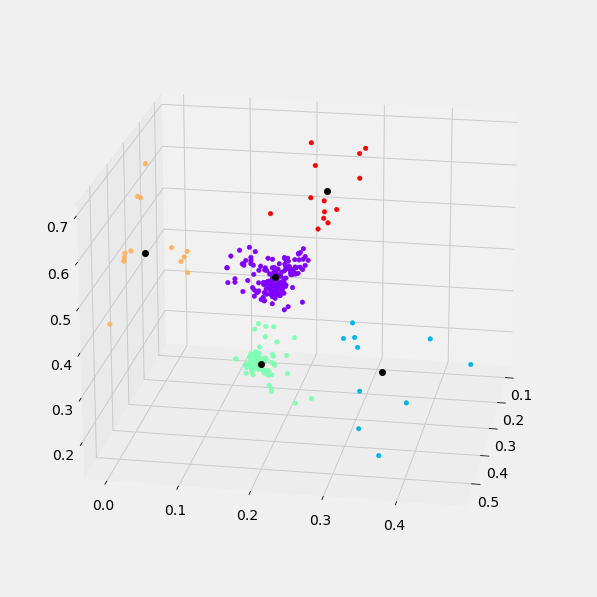

In [56]:
#3D visualization of clusters and centroids

from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,10))
ax= plt.axes(projection='3d')
ax.view_init(20,10)

ax.scatter3D(df3['production_1%'],df3['production_2%'],df3['production_3%'],c=df3['Clusters'],cmap='rainbow',alpha=1)

#ax.scatter3D(x_test_new['production_1%'],x_test_new['production_2%'],x_test_new['production_3%'],c=x_test_new['Clusters'],cmap='rainbow',alpha=1)


ax.plot([centroids[0,0]], [centroids[0,1]], [centroids[0,2]], c='k', marker='o')
ax.plot([centroids[1,0]], [centroids[1,1]], [centroids[1,2]], c='k', marker='o')
ax.plot([centroids[2,0]], [centroids[2,1]], [centroids[2,2]], c='k', marker='o')
ax.plot([centroids[3,0]], [centroids[3,1]], [centroids[3,2]], c='k', marker='o')
ax.plot([centroids[4,0]], [centroids[4,1]], [centroids[4,2]], c='k', marker='o')
#ax.plot([centroids[5,0]], [centroids[5,1]], [centroids[5,2]], c='k', marker='o')'''

plt.show()

##################################################################

In [57]:
###################################################################

# Train Test split

In [58]:
x= df3.drop('Clusters',axis=1)
y= df3['Clusters']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.10,random_state=5)

# finding clusters for training set

In [59]:
#selecting features

Z= x_train.loc[:, ['production_1%','production_2%','production_3%']]
Z.head()

,production_1%,production_2%,production_3%
196,0.478817,0.185507,0.335676
197,0.483883,0.184196,0.331921
240,0.427244,0.209082,0.363673
169,0.410449,0.201635,0.387916
102,0.337143,0.190414,0.472444


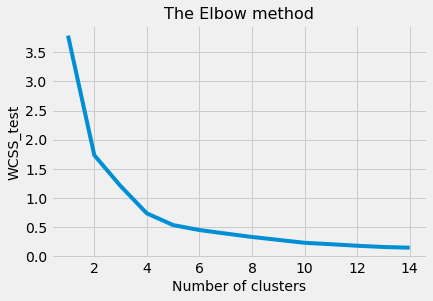

In [60]:
from sklearn.cluster import KMeans

wcss_test=[]

for i in range(1,15):
    kmeans= KMeans(i)
    kmeans.fit(Z)
    wcss_test.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")    
plt.plot(range(1,15),wcss_test)
plt.title('The Elbow method',fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS_test',fontsize=14)
plt.show()

In [61]:
kmeans_train = KMeans(5,random_state=18)
kmeans_train.fit(Z)

KMeans(n_clusters=5, random_state=18)

In [62]:
kmeans_train.labels_

array([1, 1, 1, 1, 0, 2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 3, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 2, 1, 3, 0, 1, 0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 4, 1, 3,
       0, 1, 0, 4, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 4, 1, 3, 0, 3, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       4, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 4, 4, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 4, 0, 1, 1, 0, 0, 0, 1, 1])

In [63]:
centroids_train= kmeans_train.cluster_centers_
centroids_train

array([[0.34645622, 0.19091155, 0.46263223],
       [0.46849144, 0.19455607, 0.33695249],
       [0.18228757, 0.2372898 , 0.58042263],
       [0.4157121 , 0.02846025, 0.55582765],
       [0.3833464 , 0.33991725, 0.27673635]])

In [64]:
x_train_new= x_train.copy()
x_train_new['Clusters']= kmeans_train.labels_
x_train_new.head(20)

,index,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%,Clusters
196,48,2019-02-22,65.90,25.531516,46.1993,137.630816,0.478817,0.185507,0.335676,1
197,49,2019-02-23,66.71,25.393947,45.7600,137.863947,0.483883,0.184196,0.331921,1
240,143,2019-08-06,59.68,29.205853,50.8000,139.685853,0.427244,0.209082,0.363673,1
169,8,2019-01-13,58.68,28.826913,55.4586,142.965513,0.410449,0.201635,0.387916,1
102,219,2019-10-21,47.07,26.584542,65.9600,139.614542,0.337143,0.190414,0.472444,0
273,148,2019-08-11,23.22,29.828664,64.2800,117.328664,0.197906,0.254232,0.547863,2
268,227,2019-11-02,29.76,0.076288,65.4800,95.316288,0.312224,0.000800,0.686976,3
77,180,2019-09-12,43.51,21.180590,67.3986,132.089190,0.329399,0.160351,0.510251,0
228,90,2019-04-05,51.83,26.662081,40.3181,118.810181,0.436242,0.224409,0.339349,1
57,149,2019-08-12,46.53,24.275888,64.4493,135.255188,0.344016,0.179482,0.476502,0


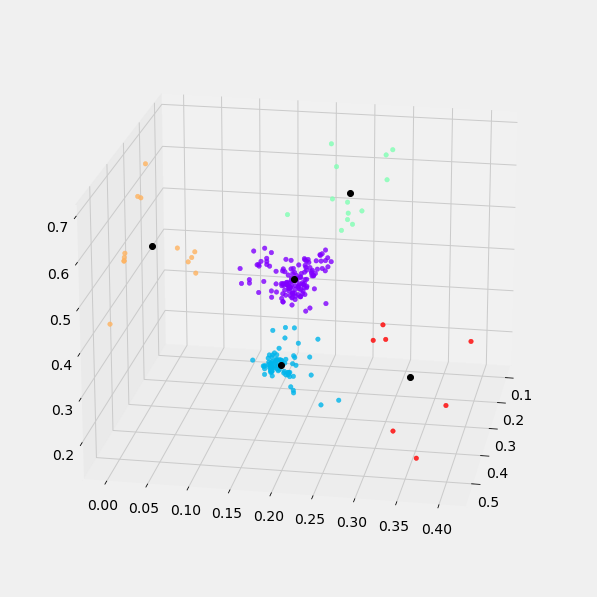

In [65]:
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,10))
ax= plt.axes(projection='3d')
ax.view_init(20,10)





#ax.scatter3D(df2_new['production_1%'],df2_new['production_2%'],df2_new['production_3%'],c=df2_new['Clusters'],cmap='rainbow',alpha=1)
ax.scatter3D(x_train_new['production_1%'],x_train_new['production_2%'],x_train_new['production_3%'],c=x_train_new['Clusters'],cmap='rainbow',alpha=.8)

ax.plot([centroids_train[0,0]], [centroids_train[0,1]], [centroids_train[0,2]], c='k', marker='o')
ax.plot([centroids_train[1,0]], [centroids_train[1,1]], [centroids_train[1,2]], c='k', marker='o')
ax.plot([centroids_train[2,0]], [centroids_train[2,1]], [centroids_train[2,2]], c='k', marker='o')
ax.plot([centroids_train[3,0]], [centroids_train[3,1]], [centroids_train[3,2]], c='k', marker='o')
ax.plot([centroids_train[4,0]], [centroids_train[4,1]], [centroids_train[4,2]], c='k', marker='o')
#ax.plot([centroids[5,0]], [centroids[5,1]], [centroids[5,2]], c='k', marker='o')

plt.show()

# Finding clusters for test set

In [66]:
#selecting features

Y= x_test.loc[:, ['production_1%','production_2%','production_3%']]
Y.head()

,production_1%,production_2%,production_3%
157,0.363419,0.311979,0.324603
205,0.473910,0.195730,0.330360
237,0.458213,0.199850,0.341936
50,0.319424,0.219594,0.460982
204,0.457055,0.189895,0.353051


In [67]:
def distance(point1, point2):
    dist=np.linalg.norm(point1-point2)
    return dist

In [68]:
Y['cluster']= 0

In [69]:
centroids_test=np.array(centroids_train)
for i in range(len(Y)):
    dist_list=[]
    
    for point2 in centroids_test:
        point1=np.array(Y.iloc[i].to_list()[:-1])
        
        dist=distance(point1,point2)
        dist_list.append(dist)
        
    result=np.where(dist_list==np.amin(np.array(dist_list)))
    
    #print(result)
    Y['cluster'].iloc[i]=result[0]

In [70]:
Y

,production_1%,production_2%,production_3%,cluster
157,0.363419,0.311979,0.324603,4
205,0.473910,0.195730,0.330360,1
237,0.458213,0.199850,0.341936,1
50,0.319424,0.219594,0.460982,0
204,0.457055,0.189895,0.353051,1
159,0.418415,0.323825,0.257760,4
162,0.283997,0.462011,0.253992,4
144,0.359458,0.197681,0.442862,0
257,0.437764,0.007194,0.555042,3
250,0.483845,0.162430,0.353724,1


### plotting the train and test cluster values together

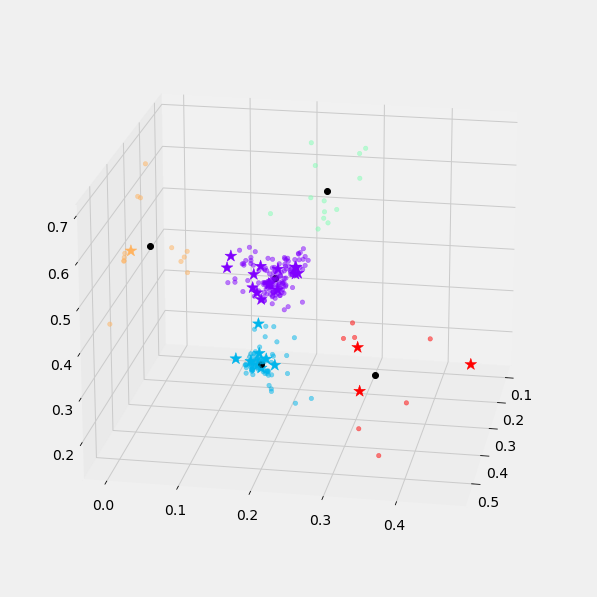

In [71]:
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,10))
ax= plt.axes(projection='3d')
ax.view_init(20,10)





ax.scatter3D(Y['production_1%'],Y['production_2%'],Y['production_3%'],c=Y['cluster'],marker = '*',s=150,cmap='rainbow',alpha=1) #test_data
ax.scatter3D(x_train_new['production_1%'],x_train_new['production_2%'],x_train_new['production_3%'],c=x_train_new['Clusters'],cmap='rainbow',alpha=.5) #training_data

ax.plot([centroids_train[0,0]], [centroids_train[0,1]], [centroids_train[0,2]], c='k', marker='o')
ax.plot([centroids_train[1,0]], [centroids_train[1,1]], [centroids_train[1,2]], c='k', marker='o')
ax.plot([centroids_train[2,0]], [centroids_train[2,1]], [centroids_train[2,2]], c='k', marker='o')
ax.plot([centroids_train[3,0]], [centroids_train[3,1]], [centroids_train[3,2]], c='k', marker='o')
ax.plot([centroids_train[4,0]], [centroids_train[4,1]], [centroids_train[4,2]], c='k', marker='o')
#ax.plot([centroids[5,0]], [centroids[5,1]], [centroids[5,2]], c='k', marker='o')'''

plt.show()

**Looks like training and test data are working well**

# Dealing with 2nd Dataset

In [72]:
dataset_2= pd.read_csv('S:\HRV ML course\internship HR venture\production_variable_data.csv')

In [73]:
dataset_2.head(100)

,Unnamed: 0,Timestamp,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
0,0,01-Jan-19 00:15:00,0,32.55627823,101.1369705,40.01234818,8.438112259,-0.122070313,-0.09765625,-0.024414063,77.60620117,77.20552063,56.61468887,56.62029648,84.04428864,92.86371613,0.193467438,6.658519745,0.204663858,-0.049560547,-0.158652931,0.000244141,-0.002441406,-0.007043579,4.77103281,5.529689789,-0.000457838,2.49187994,1.79583478,2858.822021,0.038851019,39.42317963,49.94494247,14.85337067,1.600726247,2.393295527,24.14758492,5.661610603,5.588162422,0.014648438,0.249042183,5.41445446,5.308913708,0.306786776,0.703868687,-0.017089844,-0.021972656,0.002442598,32.97780991
1,1,01-Jan-19 00:30:00,0,33.29818726,101.0385437,40.18921661,8.64615345,-0.122070313,-0.09765625,-0.024414063,77.69998169,77.32296753,56.69773102,56.69044113,83.94763947,96.06293488,0.170898438,6.65771389,0.202260867,-0.049560547,-0.159912109,0.000274658,-0.002441406,-0.00711916,4.759511471,5.529500961,-0.000405331,2.494243383,1.783870935,3011.554443,0.038524184,38.48815918,49.66067123,13.31829739,1.601826668,2.394313574,24.14110374,5.656737804,5.588378429,0.019065132,0.252667069,5.412865639,5.304360867,0.284250945,0.702071846,-0.017089844,-0.021972656,0.002441406,32.89932251
2,2,01-Jan-19 00:45:00,0,32.81989288,105.6545334,40.29273987,8.175516129,-0.122070313,-0.09765625,-0.024414063,77.80279541,77.46892548,56.76230621,56.80112839,83.9159317,99.2771759,0.170898438,6.668167114,0.20567517,-0.049560547,-0.161132813,0.000246294,-0.002441406,-0.006103516,4.768688202,5.533175945,-6.33336E-07,2.491421223,1.802844405,2662.552002,0.038623806,39.52436066,49.76094818,14.58533096,1.604532242,2.39597702,24.13620758,5.659318447,5.590717316,0.014648605,0.24938561,5.418362617,5.314437389,0.315076321,0.700870574,-0.017089844,-0.021972656,0.002746582,33.05628967
3,3,01-Jan-19 01:00:00,0,33.60007477,100.443924,39.84799957,9.588797569,-0.122070313,-0.09765625,-0.030517578,77.98332977,77.65703583,56.88876343,56.83909988,83.89551544,100.7625275,0.207371831,6.680757523,0.205002755,-0.049560547,-0.161132813,0.000365601,-0.002441406,-0.006103516,4.758270741,5.528217316,-5.11726E-06,2.4924016,1.785536051,2691.470215,0.03859992,39.43579483,50.00101471,14.09199047,1.604804516,2.39107132,24.12855339,5.654603958,5.586221218,0.014648438,0.249732926,5.41125679,5.304367542,0.31722948,0.701904118,-0.016687997,-0.023417283,0.002441406,32.96984863
4,4,01-Jan-19 01:15:00,0,33.33903503,101.8549957,39.75268173,8.199897766,-0.122070313,-0.09765625,-0.027616976,78.08898163,77.74836731,56.9700737,57.01060867,83.86658478,99.19974518,0.175608829,6.673531055,0.204814911,-0.049560547,-0.162353516,0.000351344,-0.002441406,-0.006103516,4.758924961,5.529901028,-4.00563E-05,2.490796566,1.788503647,2777.994141,0.03872785,39.44299316,49.75530624,14.57892704,1.601575732,2.390149355,24.13038826,5.656945705,5.587582111,0.014648438,0.250570834,5.41438055,5.306032658,0.306508064,0.701065719,-0.018170113,-0.024334027,0.002441406,32.98034668
5,5,01-Jan-19 01:30:00,0,32.54734421,105.8060226,40.06565857,9.688977242,-0.122070313,-0.09765625,-0.024415758,78.24666595,77.88580322,57.02213287,57.02659607,83.83585358,98.23377228,0.170898438,6.665252209,0.204062864,-0.049560547,-0.163574219,0.000366211,-0.002441406,-0.004882813,4.764475346,5.5330019,-7.66886E-07,2.493927717,1.791683555,2713.29248,0.038938545,39.62311172,49.80229187,14.09957218,1.603110552,2.39360714,24.14160919,5.664411545,5.596653938,0.014648438,0.249950573,5.419434547,5.311209202,0.30546084,0.70140779,-0.017089844,-0.024414063,0.002441406,33.02001953
6,6,01-Jan-19 01:45:00,0,33.50882339,101.2938004,39.9963913,7.922411442,-0.1220

In [74]:
x_train_new

,index,Date,production_1,production_2,production_3,Total production (ton),production_1%,production_2%,production_3%,Clusters
196,48,2019-02-22,65.90,25.531516,46.199300,137.630816,0.478817,0.185507,0.335676,1
197,49,2019-02-23,66.71,25.393947,45.760000,137.863947,0.483883,0.184196,0.331921,1
240,143,2019-08-06,59.68,29.205853,50.800000,139.685853,0.427244,0.209082,0.363673,1
169,8,2019-01-13,58.68,28.826913,55.458600,142.965513,0.410449,0.201635,0.387916,1
102,219,2019-10-21,47.07,26.584542,65.960000,139.614542,0.337143,0.190414,0.472444,0
273,148,2019-08-11,23.22,29.828664,64.280000,117.328664,0.197906,0.254232,0.547863,2
268,227,2019-11-02,29.76,0.076288,65.480000,95.316288,0.312224,0.000800,0.686976,3
77,180,2019-09-12,43.51,21.180590,67.398600,132.089190,0.329399,0.160351,0.510251,0
228,90,2019-04-05,51.83,26.662081,40.318100,118.810181,0.436242,0.224409,0.339349,1
57,149,2019-08-12,46.53,24.275888,64.449300,135.255188,0.344016,0.179482,0.476502,0


In [75]:
dataset_2["Timestamp"] = pd.to_datetime(dataset_2["Timestamp"], errors='coerce')

In [76]:
dataset_2.sample(100)

,Unnamed: 0,Timestamp,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
6048,6048,2019-03-05 00:15:00,89.33333588,33.20756531,102.0341034,40.3102951,8.266242027,-0.121539779,-0.099931464,1.71696E-19,45.12692261,44.71798706,68.58533478,68.53656769,62.32029724,74.12484741,0.215790182,6.674373627,0.201883405,-0.049560547,-0.130615234,-0.000244141,-0.004403938,-0.007324219,4.767865658,5.569019794,0,2.4962008,1.726255298,3347.583008,0.038922176,39.65671921,50.75748825,14.84107685,1.630639791,2.415662289,24.02095985,5.694484234,5.610723972,0.01241686,0.260004133,5.440119267,5.335103512,0.266544998,0.722247481,-0.017089844,-0.024414063,0.002441406,32.30893326
26442,9066,2019-10-03 10:45:00,88.44444275,32.92888641,102.13928220000001,25.42085075,9.49065876,-0.100708008,-0.09765625,0.170898438,76.8949585,76.76258087,96.02104187,95.816185,63.62666702,88.19612885,54.90283966,6.621225357,0.16983558199999998,0.014627609,-0.08422851599999999,-0.001227271,-0.002441406,0.012207031,4.686980247,5.509331702999999,0.300400138,2.5728652480000003,1.8184564109999999,3283.384766,0.021784658,43.93558884,3099.099609,16.4843235,1.654553175,2.408760548,24.06130409,5.609494686000001,0.007324219,5.529780388,0.278973132,5.3593926430000005,5.257444859,0.248784825,0.69728899,-0.021972656,-0.007324181,0.002441406,33.54304123
27539,10163,2019-10-14 21:00:00,88.44444275,33.75897598,101.50109859999999,22.16195107,10.39951801,-0.12130737300000001,-0.122079365,0.073242188,93.56066132,93.53012085,97.90867615,97.86008453,85.17740631,86.57084656,67.9095993,6.752976894,0.169665992,-0.021972656,-0.09277343800000001,-0.00069423,-0.004838966,-0.025634766,4.619140625,5.497927666,0.600607276,2.59208703,1.783765435,3258.089844,0.06009401,43.90908813,55.70584869,15.70409775,1.6485300059999999,2.432712317,24.221216199999997,5.517865181,0.007324219,5.437026978,0.270325541,5.268478394,5.170269489,0.237582952,0.665973425,-0.021972582,-0.007324219,0.002441406,33.28453827
24682,7306,2019-09-15 02:45:00,88.8888855,34.53951645,99.31258392,39.88098145,9.73283577,-0.122070313,-0.122880936,0.048828125,89.94942474,89.84505463,71.47918701,71.41801453,82.01888275,91.95284271,0.170898438,6.676713467,0.172283947,-0.023925781,-0.09765625,-0.001152039,-0.002441406,-0.010986328,4.618228436,5.492260456,0.031118402,2.568054199,1.79396069,2910.248047,0.052019279,42.30552673,55.39984512,15.29878998,1.656129122,2.416015863,24.08319664,5.531777382,5.454362392,0.047953296,0.271193624,5.288383007,5.184225082,0.255466014,0.683540463,-0.0218616,-0.017089844,0.002441406,33.16007996
31921,14545,2019-11-29 12:30:00,88.44444275,30.25583076,102.6441193,40.42560959,9.232533455,-0.09765625,-0.108754814,0.146484375,95.28396606,95.15673065,62.27184677,62.22148132,64.02734375,94.08916473,73.10662842,6.704559326,0.16677145699999998,-0.0019531239999999999,-0.08422851599999999,-0.000854492,-0.007324219,0.034179688,4.599681377,5.482470512000001,0.304196864,2.551901579,1.820965648,3057.273193,0.008304019000000001,45.01497269,57.34247208,16.9419117,1.64925313,2.4121029380000003,24.20256615,5.5653657910000005,5.470591067999999,0.014648438,0.279758543,5.300047398,5.192152023,0.243858501,0.662014306,-0.021972656,-0.007324219,0.002447367,33.27282715
9838,9838,2019-04-13 11:45:00,89.33333588,33.04216003,102.0293732,39.82162476,9.971469879,-0.09765625,-0.073244341,0.19656004,55.02315521,55.06768417,50.41083908,50.41766739,87.63699341,87.89631653,0.244140625,6.664634705,0.19958058,0.043203644,-0.057373047,-0.000854492,-0.004882813,0.031738281,4.697118282,5.546890259,4.48347E-07,2.495246887,1.748921037,2796.092041,-0.003248099,30.91129303,51.25991058,15.32223797,1.643318892,

In [77]:
dataset_2=dataset_2.dropna(axis=1, how='all') # dropping all columns with nan values
dataset_2=dataset_2.dropna(axis=0, how='all') #  dropping all columns with nan values

In [78]:
dataset_2["Timestamp"]=dataset_2['Timestamp'].dt.date

In [79]:
dataset_2.shape

(35040, 49)

In [80]:
dataset_2.columns

Index(['Unnamed: 0', 'Timestamp', 'Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'],
      dtype='object')

In [81]:
for i in dataset_2.columns:
    #print(i)
    dataset_2=dataset_2[dataset_2[i] != 'Bad']

In [82]:
dataset_2.shape

(33310, 49)

In [83]:
dataset_2.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [84]:
dataset_2.head(100)

,Timestamp,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
0,2019-01-01,0,32.55627823,101.1369705,40.01234818,8.438112259,-0.122070313,-0.09765625,-0.024414063,77.60620117,77.20552063,56.61468887,56.62029648,84.04428864,92.86371613,0.193467438,6.658519745,0.204663858,-0.049560547,-0.158652931,0.000244141,-0.002441406,-0.007043579,4.77103281,5.529689789,-0.000457838,2.49187994,1.79583478,2858.822021,0.038851019,39.42317963,49.94494247,14.85337067,1.600726247,2.393295527,24.14758492,5.661610603,5.588162422,0.014648438,0.249042183,5.41445446,5.308913708,0.306786776,0.703868687,-0.017089844,-0.021972656,0.002442598,32.97780991
1,2019-01-01,0,33.29818726,101.0385437,40.18921661,8.64615345,-0.122070313,-0.09765625,-0.024414063,77.69998169,77.32296753,56.69773102,56.69044113,83.94763947,96.06293488,0.170898438,6.65771389,0.202260867,-0.049560547,-0.159912109,0.000274658,-0.002441406,-0.00711916,4.759511471,5.529500961,-0.000405331,2.494243383,1.783870935,3011.554443,0.038524184,38.48815918,49.66067123,13.31829739,1.601826668,2.394313574,24.14110374,5.656737804,5.588378429,0.019065132,0.252667069,5.412865639,5.304360867,0.284250945,0.702071846,-0.017089844,-0.021972656,0.002441406,32.89932251
2,2019-01-01,0,32.81989288,105.6545334,40.29273987,8.175516129,-0.122070313,-0.09765625,-0.024414063,77.80279541,77.46892548,56.76230621,56.80112839,83.9159317,99.2771759,0.170898438,6.668167114,0.20567517,-0.049560547,-0.161132813,0.000246294,-0.002441406,-0.006103516,4.768688202,5.533175945,-6.33336E-07,2.491421223,1.802844405,2662.552002,0.038623806,39.52436066,49.76094818,14.58533096,1.604532242,2.39597702,24.13620758,5.659318447,5.590717316,0.014648605,0.24938561,5.418362617,5.314437389,0.315076321,0.700870574,-0.017089844,-0.021972656,0.002746582,33.05628967
3,2019-01-01,0,33.60007477,100.443924,39.84799957,9.588797569,-0.122070313,-0.09765625,-0.030517578,77.98332977,77.65703583,56.88876343,56.83909988,83.89551544,100.7625275,0.207371831,6.680757523,0.205002755,-0.049560547,-0.161132813,0.000365601,-0.002441406,-0.006103516,4.758270741,5.528217316,-5.11726E-06,2.4924016,1.785536051,2691.470215,0.03859992,39.43579483,50.00101471,14.09199047,1.604804516,2.39107132,24.12855339,5.654603958,5.586221218,0.014648438,0.249732926,5.41125679,5.304367542,0.31722948,0.701904118,-0.016687997,-0.023417283,0.002441406,32.96984863
4,2019-01-01,0,33.33903503,101.8549957,39.75268173,8.199897766,-0.122070313,-0.09765625,-0.027616976,78.08898163,77.74836731,56.9700737,57.01060867,83.86658478,99.19974518,0.175608829,6.673531055,0.204814911,-0.049560547,-0.162353516,0.000351344,-0.002441406,-0.006103516,4.758924961,5.529901028,-4.00563E-05,2.490796566,1.788503647,2777.994141,0.03872785,39.44299316,49.75530624,14.57892704,1.601575732,2.390149355,24.13038826,5.656945705,5.587582111,0.014648438,0.250570834,5.41438055,5.306032658,0.306508064,0.701065719,-0.018170113,-0.024334027,0.002441406,32.98034668
5,2019-01-01,0,32.54734421,105.8060226,40.06565857,9.688977242,-0.122070313,-0.09765625,-0.024415758,78.24666595,77.88580322,57.02213287,57.02659607,83.83585358,98.23377228,0.170898438,6.665252209,0.204062864,-0.049560547,-0.163574219,0.000366211,-0.002441406,-0.004882813,4.764475346,5.5330019,-7.66886E-07,2.493927717,1.791683555,2713.29248,0.038938545,39.62311172,49.80229187,14.09957218,1.603110552,2.39360714,24.14160919,5.664411545,5.596653938,0.014648438,0.249950573,5.419434547,5.311209202,0.30546084,0.70140779,-0.017089844,-0.024414063,0.002441406,33.02001953
6,2019-01-01,0,33.50882339,101.2938004,39.9963913,7.922411442,-0.122070313,-0.09765625,-0.025658544,78.38553619,78.00652313,57.13262939,57.15405273,83

In [85]:
dataset_2.rename(columns={'Timestamp': 'Date'},
          inplace=True, errors='raise')

In [86]:
dataset_2['Date'] =  dataset_2['Date'].astype('datetime64[ns]') 

In [87]:
merged_dataset_2=pd.merge(dataset_2,df3[['Date','Clusters']])

In [88]:
merged_dataset_2.shape

(24983, 49)

In [89]:
cols=merged_dataset_2.columns
for col in cols[1:]:
    merged_dataset_2[col]=merged_dataset_2[col].astype(float)

# process variable for each cluster

## 15 mint frequency

#### Median

In [90]:
merged_dataset_2.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].median()

,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,88.888886,33.025276,102.133461,39.932770,9.058595,-0.12207,-0.122070,0.048828,86.111732,85.949112,69.538155,69.523415,73.479645,86.947548,0.170898,6.676537,0.170706,-0.022217,-0.097656,-0.000818,-0.002442,-0.002683,4.635092,5.515203,9.094960e-12,2.529539,1.790112,2948.016602,0.042637,43.268055,55.560661,16.069990,1.641634,2.416387,24.131355,5.556101,5.404366,5.391072,0.275067,5.302186,5.197269,0.262360,0.675389,-0.019844,-0.014648,0.002441,32.979218
1.0,89.333336,32.799547,102.578094,39.733946,8.716287,-0.12207,-0.122067,0.073242,64.827751,64.670650,63.656096,63.482195,69.072758,87.284504,0.170898,6.678433,0.197134,-0.017578,-0.093994,-0.000854,-0.004883,-0.002441,4.670718,5.504785,6.462350e-26,2.499080,1.714450,2595.559326,0.042132,42.047104,52.576715,15.730849,1.648340,2.413350,24.072915,5.473299,0.195180,2.753756,0.275077,5.221852,5.131249,0.286092,0.679729,-0.019594,-0.014648,0.002441,31.876657
2.0,89.333336,33.044193,101.995079,39.952063,9.002527,-0.12207,-0.101455,0.048828,54.640110,54.289152,78.064255,78.070122,78.585251,86.752617,0.176335,6.678928,0.202035,-0.025314,-0.105509,-0.000444,-0.004883,-0.002441,4.737661,5.527457,0.000000e+00,2.498735,1.733658,3034.948975,0.038722,39.314028,50.647554,15.148449,1.631346,2.420140,24.104695,5.668023,5.443469,5.431991,0.264695,5.412594,5.306494,0.286520,0.712234,-0.018988,-0.015889,0.002627,32.442486
3.0,88.444443,33.044426,102.141647,39.950840,8.770806,-0.12207,-0.122070,0.059545,68.909805,68.626984,63.850063,63.893410,70.569458,83.526802,0.210747,6.683522,0.201838,-0.025793,-0.102540,-0.000732,-0.004883,-0.002441,4.655334,5.528369,6.938890e-17,2.497010,1.742810,2927.255615,0.036644,39.473251,50.835884,15.922676,1.633428,2.419297,24.115507,5.575968,5.426128,2.334372,0.249722,5.319180,5.215588,0.268123,0.678209,-0.019554,-0.012316,0.002443,32.238770
4.0,88.444443,33.077759,101.390053,39.925465,9.116302,-0.12207,-0.122070,0.070984,96.490746,96.437408,71.651939,71.617165,73.853065,87.047241,66.955940,6.681810,0.169874,-0.017912,-0.092773,-0.001099,-0.002441,-0.008547,4.619235,5.517088,4.771001e-01,2.551732,1.788846,2962.288818,0.048429,43.487988,55.787552,16.179588,1.642348,2.418474,24.113434,5.543203,2.663213,5.394656,0.276719,5.282396,5.175781,0.256904,0.669836,-0.020527,-0.014648,0.002441,33.179192


#### STD

In [91]:
merged_dataset_2.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].std()

,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7.700199,1.518416,2.474050,1.593779,0.979650,0.011888,0.015273,0.056841,18.946114,19.054011,11.242669,11.235865,9.430684,6.467739,10.372024,0.039071,0.018427,0.024708,0.030978,0.000438,0.001943,0.016061,0.049451,0.053717,0.197203,0.034583,0.046920,250.853387,0.134985,2672.793084,352.929051,3037.631967,0.020517,47168.929217,0.108764,0.067275,2.710766,2.699663,0.008486,0.061646,0.058717,0.032896,0.018644,0.001460,0.006735,0.000344,0.633746
1.0,17.872563,11.439396,15.569630,14.610708,3.692812,0.012007,0.017309,0.057318,17.159691,17.282111,19.468137,19.458958,11.002557,6.228238,20.048714,0.689266,0.128549,0.023956,0.025809,0.000299,0.001742,0.016828,1.616335,1.369901,0.327916,0.647410,0.617818,1194.741470,0.027669,2663.219526,2.582622,2788.685490,0.432492,0.616865,6.319231,1.671035,2.590749,2.584324,0.211781,1.748977,1.718749,0.209499,0.143524,0.001280,0.007359,0.000310,12.455947
2.0,12.283947,3.189706,3.460312,3.842798,1.228225,0.011629,0.018245,0.059767,17.920315,18.008598,11.446694,11.438465,10.190470,6.795284,9.569854,0.125281,0.028248,0.022277,0.028951,0.000474,0.001973,0.019858,0.294766,0.346037,0.161331,0.121705,0.119348,425.560064,0.187092,2840.774439,349.565728,2809.251649,0.081611,0.137957,1.319588,0.315971,2.753607,2.747045,0.043241,0.316452,0.308506,0.053358,0.024813,0.001535,0.007269,0.000501,2.384754
3.0,17.542307,1.154665,2.509406,0.402559,0.855706,0.011372,0.017979,0.060801,18.063406,18.191903,12.550909,12.529921,7.782465,6.616242,25.403597,0.039618,0.020678,0.025728,0.030106,0.000335,0.001688,0.018155,0.057753,0.070033,0.293015,0.029032,0.047019,209.835496,0.028199,2929.336438,2.964895,3232.888697,0.018149,0.013566,0.072781,0.045473,2.704863,2.706417,0.015369,0.043001,0.046484,0.022779,0.014541,0.001794,0.006811,0.000467,0.576777
4.0,25.789167,1.349135,4.678791,0.398569,1.295486,0.009462,0.009095,0.043020,3.108436,3.101051,8.837900,8.833338,6.726861,6.054673,31.816090,0.039838,0.016108,0.017533,0.017947,0.000319,0.001361,0.016484,0.035459,0.039808,0.391561,0.027243,0.021032,217.834940,0.020282,2644.022637,721.848413,3134.004425,0.012853,0.011405,0.082143,0.047929,2.705992,2.683280,0.006737,0.047014,0.044037,0.028870,0.016515,0.001073,0.007605,0.000144,0.303047


#### Whole description of data

In [109]:
description_of_15minfreq = merged_dataset_2.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].describe()

In [93]:
description_of_15minfreq.reset_index(inplace=True)

In [94]:
description_of_15minfreq

Clusters    Value                                                        \
              count       mean        std       min        25%        50%   
0      0.0  14167.0  88.190876   7.700199 -4.000000  88.444443  88.888886   
1      1.0    862.0  85.331787  17.872563 -4.000000  88.444443  89.333336   
2      2.0   7670.0  87.323368  12.283947  0.000000  88.888886  89.333336   
3      3.0   1235.0  85.043737  17.542307  0.000000  88.444443  88.444443   
4      4.0   1049.0  80.181123  25.789167  0.444444  88.444443  88.444443   

                         Value.1                                              \
         75%        max    count       mean        std        min        25%   
0  89.333336  89.333336  14167.0  32.986860   1.518416   1.411845  32.377317   
1  89.333336  89.333336    862.0  30.832319  11.439396   0.397576  31.458861   
2  89.333336  89.333336   7670.0  33.150496   3.189706   0.664838  32.410325   
3  89.333336  89.333336   1235.0  33.046629   1.154665  28.233646  32.358805   
4  88.444443  88.888886   1049.0  33.011842   1.349135  27.606543  32.199692   

                                    Value.2                                    \
         50%        75%        max    count        mean        std        min   
0  33.025276  33.670198  38.423462  14167.0  102.129212   2.474050  73.098526   
1  32.799547  33.690937  89.936745    862.0  107.723340  15.569630  35.448711   
2  33.044193  33.661746  80.175682   7670.0  102.148041   3.460312  44.580196   
3  33.044426  33.777010  37.223816   1235.0  102.179173   2.509406  85.355560   
4  33.077759  33.768108  39.046677   1049.0  100.603717   4.678791  82.453659   

                                                   Value.3             \
          25%         50%         75%         max    count       mean   
0  100.896061  102.133461  103.428463  136.527649  14167.0  39.862316   
1  100.342958  102.578094  107.592554  137.490387    862.0  31.690341   
2  101.016588  101.995079  103.048946  138.883652   7670.0  39.652083   
3  100.831795  102.141647  103.490555  112.877045   1235.0  39.941034   
4   98.582565  101.390053  103.322174  117.672081   1049.0  39.926601   

                                                                     Value.4  \
         std        min        25%        50%        75%        max    count   
0   1.593779   2.442166  39.685009  39.932770  40.172194  59.347652  14167.0   
1  14.610708   2.392578  23.154865  39.733946  40.105745  66.010742    862.0   
2   3.842798   3.001086  39.691081  39.952063  40.197741  74.748215   7670.0   
3   0.402559  38.552406  39.688297  39.950840  40.198782  44.008312   1235.0   
4   0.398569  38.010624  39.694942  39.925465  40.182838  41.501621   1049.0   

                                                                          \
       mean       std       min       25%       50%       75%        max   
0  9.093220  0.979650  6.643776  8.352617  9.058595  9.743027  14.265655   
1  7.405830  3.692812  0.156470  7.707210  8.716287  9.476400  35.644848   
2  8.971844  1.228225  0.156470  8.248838  9.002527  9.711677  12.631217   
3  8.784255  0.855706  6.858308  8.104727  8.770806  9.492334  11.456212   
4  9.335835  1.295486  5.776082  8.422837  9.116302  9.959726  14.461532   

   Value.5                                                            \
     count      mean       std       min      25%      50%       75%   
0  14167.0 -0.113867  0.011888 -0.146484 -0.12207 -0.12207 -0.097729   
1    862.0 -0.115740  0.012007 -0.146484 -0.12207 -0.12207 -0.110025   
2   7670.0 -0.115941  0.011629 -0.146484 -0.12207 -0.12207 -0.114160   
3   1235.0 -0.117743  0.011372 -0.146484 -0.12207 -0.12207 -0.120039   
4   1049.0 -0.116625  0.009462 -0.122070 -0.12207 -0.12207 -0.116068   

             Value.6                                                    \
        max    count      mean       std       min       25%       50%   
0 -0.073242  14167.0 -0.115444  0.015273 -0.146484 -0.122070 -0.122070   


#### saving CSV of 15 minute frequency process variable from 2nd dataset

In [96]:
description_of_15minfreq.to_csv(r'S:\HRV ML course\internship HR venture\description_of_15minfreq_process_variable.csv', index = False, header = True)

## Daily frequency

In [97]:
df_dataset= merged_dataset_2.groupby('Date')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].mean()

In [98]:
df_dataset

,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,51.578946,32.993876,101.917541,39.914238,8.787676,-0.112375,-0.096717,0.022499,80.076627,79.765833,59.711990,59.705918,85.141531,86.636484,0.205146,6.675291,0.205501,-0.042392,-0.144605,1.040139e-04,-0.004721,0.010029,4.749243,5.521638,-1.877785e-04,2.494177,1.768268,2799.264882,0.028229,643.246118,49.730759,564.653411,1.605550,2.418875,24.207742,5.654198,2.470246,3.354703,0.256650,5.407448,5.302410,0.301176,0.701028,-0.017547,-0.017717,0.002848,32.745105
2019-01-02,86.725662,32.929502,101.907110,39.917163,8.738876,-0.115038,-0.096070,0.023767,80.763607,80.382976,59.969022,59.997665,84.048546,87.149470,0.196758,6.668761,0.196581,-0.043002,-0.141773,5.315328e-05,-0.004878,0.009854,4.759318,5.533580,-2.648241e-04,2.488910,1.723114,2844.703992,0.026295,770.253855,49.776936,1178.534054,1.608356,2.416760,24.171940,5.656551,3.503412,2.401100,0.260377,5.410716,5.309936,0.298900,0.703384,-0.017494,-0.016567,0.002995,32.100395
2019-01-03,86.725662,33.096379,102.567036,39.859940,8.674450,-0.114786,-0.096814,0.026937,85.394744,85.028632,61.144005,61.153664,83.148072,87.503662,0.209865,6.683919,0.198502,-0.041883,-0.139503,3.277694e-05,-0.005380,0.009424,4.725436,5.525385,-1.902032e-04,2.490257,1.726192,2976.374236,0.024963,530.522500,49.883307,671.066975,1.606215,2.426839,24.194425,5.622924,2.775919,3.033504,0.267438,5.377882,5.275953,0.277671,0.689616,-0.017715,-0.015415,0.003074,32.083201
2019-01-04,86.725662,33.045679,103.215275,39.885729,8.721761,-0.112940,-0.095195,0.024317,84.341572,84.001621,64.628075,64.649280,81.993454,86.951561,0.198154,6.681614,0.216135,-0.042262,-0.142173,6.308685e-05,-0.004819,0.009387,4.728275,5.512694,-2.565717e-04,2.490795,1.743843,2908.237495,0.030609,1506.215849,49.776736,866.083079,1.606386,2.425338,24.206625,5.631763,2.446687,3.353643,0.269134,5.387603,5.284202,0.291455,0.695530,-0.017328,-0.017939,0.002974,32.333522
2019-01-05,86.725662,32.965185,102.929356,39.836135,8.751519,-0.114808,-0.096943,0.029561,76.045817,75.694255,62.723213,62.742258,80.847183,86.482513,0.194637,6.686589,0.212465,-0.041448,-0.138028,9.904732e-06,-0.005086,0.009624,4.713139,5.533271,-2.852776e-04,2.490284,1.745082,2888.635902,0.027250,1223.777068,49.811508,1381.151241,1.608104,2.426138,24.193865,5.603655,3.455260,2.393600,0.248652,5.353502,5.252419,0.281313,0.683870,-0.017220,-0.019187,0.003043,32.243907
2019-01-09,41.104350,33.027854,101.765117,39.915397,8.729428,-0.114389,-0.096349,0.009564,62.691684,62.302686,67.762325,67.793603,75.642844,85.801497,0.207903,6.680970,0.203627,-0.044721,-0.146436,9.342953e-05,-0.004870,0.010372,4.687598,5.550382,-4.546768e-04,2.492461,1.761404,3034.669546,0.030912,536.233469,49.946259,1103.927514,1.604949,2.428485,24.237231,5.582645,2.912714,2.843262,0.245270,5.331332,5.230311,0.257076,0.676655,-0.017268,-0.021029,0.002929,32.545600
2019-01-15,88.355257,33.104437,101.999022,39.928392,8.948491,-0.116075,-0.099475,0.048980,65.850120,65.481268,88.446236,88.439718,69.984999,83.451802,0.220701,6.690442,0.205656,-0.038135,-0.122014,-1.378782e-04,-0.007043,0.015404,4.760948,5.511028,-1.327775e-06,2.493776,1.764847,3069.577144,0.025074,1860.574550,50.069400,1694.383732,1.609222,2.413125,24.186359,5.683264,2.569911,3.214428,0.258956,5.424966,5.320754,0.280457,0.709498,-0.017673,-0.014234,0.003162,32.753920
2019-01-16,89.333336,33.152147,101.936972,39.859578,8.775029,-0.115197,-0.097537,0.029164,63.974752,63.617438,88.171211,88.194020,68.082173,85.127240,0.201049,6.674500,0.206467,-0.040515,-0.137747,8.068040e-06,-0.005338,0.009734,4.

In [99]:
df_dataset.reset_index(inplace=True)

In [100]:
merged_dataset_3=pd.merge(df_dataset,df3[['Date','Clusters']])

In [101]:
merged_dataset_3

,Date,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49,Clusters
0,2019-01-01,51.578946,32.993876,101.917541,39.914238,8.787676,-0.112375,-0.096717,0.022499,80.076627,79.765833,59.711990,59.705918,85.141531,86.636484,0.205146,6.675291,0.205501,-0.042392,-0.144605,1.040139e-04,-0.004721,0.010029,4.749243,5.521638,-1.877785e-04,2.494177,1.768268,2799.264882,0.028229,643.246118,49.730759,564.653411,1.605550,2.418875,24.207742,5.654198,2.470246,3.354703,0.256650,5.407448,5.302410,0.301176,0.701028,-0.017547,-0.017717,0.002848,32.745105,2
1,2019-01-02,86.725662,32.929502,101.907110,39.917163,8.738876,-0.115038,-0.096070,0.023767,80.763607,80.382976,59.969022,59.997665,84.048546,87.149470,0.196758,6.668761,0.196581,-0.043002,-0.141773,5.315328e-05,-0.004878,0.009854,4.759318,5.533580,-2.648241e-04,2.488910,1.723114,2844.703992,0.026295,770.253855,49.776936,1178.534054,1.608356,2.416760,24.171940,5.656551,3.503412,2.401100,0.260377,5.410716,5.309936,0.298900,0.703384,-0.017494,-0.016567,0.002995,32.100395,2
2,2019-01-03,86.725662,33.096379,102.567036,39.859940,8.674450,-0.114786,-0.096814,0.026937,85.394744,85.028632,61.144005,61.153664,83.148072,87.503662,0.209865,6.683919,0.198502,-0.041883,-0.139503,3.277694e-05,-0.005380,0.009424,4.725436,5.525385,-1.902032e-04,2.490257,1.726192,2976.374236,0.024963,530.522500,49.883307,671.066975,1.606215,2.426839,24.194425,5.622924,2.775919,3.033504,0.267438,5.377882,5.275953,0.277671,0.689616,-0.017715,-0.015415,0.003074,32.083201,0
3,2019-01-04,86.725662,33.045679,103.215275,39.885729,8.721761,-0.112940,-0.095195,0.024317,84.341572,84.001621,64.628075,64.649280,81.993454,86.951561,0.198154,6.681614,0.216135,-0.042262,-0.142173,6.308685e-05,-0.004819,0.009387,4.728275,5.512694,-2.565717e-04,2.490795,1.743843,2908.237495,0.030609,1506.215849,49.776736,866.083079,1.606386,2.425338,24.206625,5.631763,2.446687,3.353643,0.269134,5.387603,5.284202,0.291455,0.695530,-0.017328,-0.017939,0.002974,32.333522,0
4,2019-01-05,86.725662,32.965185,102.929356,39.836135,8.751519,-0.114808,-0.096943,0.029561,76.045817,75.694255,62.723213,62.742258,80.847183,86.482513,0.194637,6.686589,0.212465,-0.041448,-0.138028,9.904732e-06,-0.005086,0.009624,4.713139,5.533271,-2.852776e-04,2.490284,1.745082,2888.635902,0.027250,1223.777068,49.811508,1381.151241,1.608104,2.426138,24.193865,5.603655,3.455260,2.393600,0.248652,5.353502,5.252419,0.281313,0.683870,-0.017220,-0.019187,0.003043,32.243907,3
5,2019-01-09,41.104350,33.027854,101.765117,39.915397,8.729428,-0.114389,-0.096349,0.009564,62.691684,62.302686,67.762325,67.793603,75.642844,85.801497,0.207903,6.680970,0.203627,-0.044721,-0.146436,9.342953e-05,-0.004870,0.010372,4.687598,5.550382,-4.546768e-04,2.492461,1.761404,3034.669546,0.030912,536.233469,49.946259,1103.927514,1.604949,2.428485,24.237231,5.582645,2.912714,2.843262,0.245270,5.331332,5.230311,0.257076,0.676655,-0.017268,-0.021029,0.002929,32.545600,3
6,2019-01-15,88.355257,33.104437,101.999022,39.928392,8.948491,-0.116075,-0.099475,0.048980,65.850120,65.481268,88.446236,88.439718,69.984999,83.451802,0.220701,6.690442,0.205656,-0.038135,-0.122014,-1.378782e-04,-0.007043,0.015404,4.760948,5.511028,-1.327775e-06,2.493776,1.764847,3069.577144,0.025074,1860.574550,50.069400,1694.383732,1.609222,2.413125,24.186359,5.683264,2.569911,3.214428,0.258956,5.424966,5.320754,0.280457,0.709498,-0.017673,-0.014234,0.003162,32.753920,2
7,2019-01-16,89.333336,33.152147,101.936972,39.859578,8.775029,-0.115197,-0.097537,0.029164,63.974752,63.617438,88.171211,88.194020,68.082173,85.127240,0.201049,6.674500,0.206467,-0.040515,-0.137747,8.068040e-06,-0.005338,0.009734,4.755809,5

In [102]:
merged_dataset_3.shape

(265, 49)

#### Median

In [103]:
merged_dataset_3.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].mean()

,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,88.192824,32.986756,102.129376,39.862193,9.092550,-0.113854,-0.115449,0.066311,77.317213,77.178683,70.519159,70.503239,73.373068,86.744127,2.619237,6.675251,0.182190,-0.020219,-0.100720,-0.000740,-0.003820,0.001685,4.642480,5.514509,0.103785,2.524280,1.781592,2948.527572,0.042872,698.711376,93.424525,996.878330,1.644305,401.725953,24.130371,5.560675,2.892380,2.876994,0.273704,5.310153,5.204471,0.268790,0.678172,-0.020139,-0.014821,0.002593,32.882973
1,85.356162,31.230071,107.929882,31.762035,7.402833,-0.115717,-0.112304,0.084002,74.038968,73.834405,67.514931,67.480097,71.165345,86.985057,7.953321,6.545790,0.202200,-0.011077,-0.090259,-0.000886,-0.004204,0.001439,3.915902,4.950115,0.177143,2.252072,1.423269,2088.348675,0.036602,652.160404,53.619285,786.540699,1.533625,2.255795,22.563145,4.823952,2.371493,2.726276,0.369297,4.399020,4.332741,0.384480,0.716613,-0.019963,-0.013882,0.002575,26.050175
2,87.284908,33.215275,102.208357,39.606292,8.956532,-0.115960,-0.106376,0.063748,57.160629,56.852884,78.120184,78.107545,75.273608,86.478052,2.211156,6.671880,0.193923,-0.025038,-0.108892,-0.000508,-0.004662,0.003093,4.703251,5.493163,0.044112,2.494303,1.733770,3006.747890,0.039257,808.732356,90.248540,833.461954,1.627062,2.410068,23.988699,5.631698,2.904530,2.930713,0.268415,5.375012,5.269389,0.292701,0.712948,-0.018904,-0.015888,0.002897,32.321833
3,85.079808,33.047753,102.180395,39.941024,8.783051,-0.117737,-0.113093,0.075137,73.545257,73.287106,62.807375,62.789117,69.156070,83.870672,14.144059,6.679720,0.190328,-0.018322,-0.098203,-0.000581,-0.004608,0.004741,4.640225,5.500581,0.194944,2.515968,1.759539,2940.173900,0.025929,832.271122,52.777337,1179.562155,1.633800,2.419290,24.120639,5.572350,3.036423,2.744334,0.254828,5.315123,5.208848,0.266913,0.675996,-0.019819,-0.012383,0.002792,32.499278
4,80.947999,33.012468,100.556714,39.927909,9.353035,-0.116678,-0.122092,0.076164,95.186926,95.104083,73.671575,73.627118,74.524012,86.891680,59.739859,6.679995,0.174554,-0.015644,-0.090653,-0.001046,-0.003154,-0.006656,4.617894,5.514901,0.511035,2.542764,1.791782,2963.298508,0.044876,662.443359,226.067283,1054.379576,1.646748,2.418982,24.132879,5.548503,2.736130,3.007387,0.275017,5.291751,5.183570,0.262618,0.673672,-0.020607,-0.014864,0.002470,33.125072


#### STD

In [104]:
merged_dataset_3.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].std()

,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,Value.9,Value.10,Value.11,Value.12,Value.15,Value.17,Value.18,Value.19,Value.20,Value.21,Value.22,Value.23,Value.24,Value.25,Value.26,Value.27,Value.28,Value.29,Value.30,Value.31,Value.32,Value.33,Value.34,Value.35,Value.36,Value.37,Value.38,Value.39,Value.40,Value.41,Value.42,Value.43,Value.44,Value.45,Value.46,Value.47,Value.48,Value.49
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.253504,0.341727,0.584654,0.564162,0.551771,0.007275,0.008923,0.033902,18.874258,18.983859,11.072813,11.065979,9.274174,1.650122,7.156894,0.007778,0.015073,0.018253,0.024322,0.000412,0.001335,0.006382,0.041058,0.022744,0.186823,0.029097,0.033850,129.360548,0.036868,323.144672,146.694010,483.181468,0.019144,4857.810102,0.098913,0.048856,0.427718,0.421509,0.007264,0.046624,0.045421,0.026371,0.017003,0.001075,0.004713,0.000222,0.401865
1,11.574253,4.468869,8.756381,7.143233,2.023239,0.005604,0.008262,0.028868,18.019629,18.148544,20.159471,20.151469,7.177522,2.263707,20.635807,0.412737,0.047081,0.014259,0.016947,0.000272,0.001256,0.005751,1.077860,0.983714,0.243982,0.392103,0.370508,579.020536,0.014171,431.135645,2.670559,502.253148,0.248044,0.340173,3.392459,0.936434,0.632979,0.573426,0.119765,1.168877,1.156296,0.108758,0.074846,0.000737,0.005846,0.000124,7.658277
2,9.219861,2.278120,2.143114,2.175609,0.715425,0.003348,0.010074,0.026213,17.868789,17.957308,11.312011,11.304000,9.823988,1.649400,7.953718,0.048630,0.017538,0.013543,0.020069,0.000440,0.001138,0.009498,0.239781,0.277947,0.143599,0.100364,0.096458,302.696328,0.053597,391.135689,134.276458,509.645274,0.049467,0.093631,0.846765,0.239577,0.428389,0.429988,0.035250,0.263151,0.256301,0.039185,0.017502,0.001162,0.004601,0.000292,1.979728
3,13.233825,0.093618,0.698245,0.043671,0.098011,0.002262,0.010130,0.033116,18.678869,18.814775,12.845179,12.823648,6.757584,3.117622,22.928100,0.009662,0.018270,0.015937,0.021429,0.000300,0.000878,0.003887,0.056162,0.062755,0.278573,0.030095,0.047499,93.808377,0.013848,420.678133,3.072372,356.055281,0.013743,0.006029,0.057569,0.041413,0.484648,0.454415,0.014891,0.039551,0.043542,0.015163,0.013414,0.001380,0.004552,0.000296,0.588633
4,21.352192,0.094159,1.419579,0.054068,0.982376,0.003787,0.002546,0.017413,1.757546,1.752949,8.802581,8.798973,6.988384,1.382871,15.744889,0.010737,0.008935,0.008530,0.008564,0.000310,0.000732,0.010134,0.027231,0.016304,0.260664,0.027775,0.017852,70.478907,0.007999,404.148217,287.037561,800.468153,0.011326,0.006713,0.080222,0.043152,0.462105,0.480307,0.005173,0.042266,0.038727,0.020696,0.015938,0.000755,0.006798,0.000069,0.278532


#### Whole description of data

In [105]:
description_of_dailyfreq = merged_dataset_3.groupby('Clusters')['Value', 'Value.1', 'Value.2', 'Value.3',
       'Value.4', 'Value.5', 'Value.6', 'Value.7', 'Value.8', 'Value.9',
       'Value.10', 'Value.11', 'Value.12', 'Value.15', 'Value.17', 'Value.18',
       'Value.19', 'Value.20', 'Value.21', 'Value.22', 'Value.23', 'Value.24',
       'Value.25', 'Value.26', 'Value.27', 'Value.28', 'Value.29', 'Value.30',
       'Value.31', 'Value.32', 'Value.33', 'Value.34', 'Value.35', 'Value.36',
       'Value.37', 'Value.38', 'Value.39', 'Value.40', 'Value.41', 'Value.42',
       'Value.43', 'Value.44', 'Value.45', 'Value.46', 'Value.47', 'Value.48',
       'Value.49'].describe()

In [106]:
description_of_dailyfreq.reset_index(inplace=True)

In [107]:
description_of_dailyfreq

Clusters  Value                                                         \
            count       mean        std        min        25%        50%   
0        0  148.0  88.192824   4.253504  51.787036  88.444443  88.888885   
1        1   10.0  85.356162  11.574253  52.431673  88.550765  89.049064   
2        2   81.0  87.284908   9.219861  24.357487  88.453899  89.333336   
3        3   13.0  85.079808  13.233825  41.104350  88.442053  88.444443   
4        4   13.0  80.947999  21.352192  13.219753  88.438517  88.444443   

                        Value.1                                             \
         75%        max   count       mean       std        min        25%   
0  89.333336  89.333336   148.0  32.986756  0.341727  29.920114  32.961252   
1  89.333336  89.333336    10.0  31.230071  4.468869  21.205869  29.367081   
2  89.333336  89.333336    81.0  33.215275  2.278120  27.779207  32.969547   
3  89.333336  89.333336    13.0  33.047753  0.093618  32.883279  32.996804   
4  88.444443  88.883260    13.0  33.012468  0.094159  32.860078  32.941058   

                                   Value.2                                    \
         50%        75%        max   count        mean       std         min   
0  33.019215  33.075878  33.309537   148.0  102.129376  0.584654  100.082023   
1  32.538140  33.071793  37.858838    10.0  107.929882  8.756381   96.467444   
2  33.025648  33.100467  52.770776    81.0  102.208357  2.143114   99.032078   
3  33.027854  33.122194  33.202508    13.0  102.180395  0.698245  100.794283   
4  33.015691  33.064268  33.179637    13.0  100.556714  1.419579   97.247085   

                                                  Value.3             \
          25%         50%         75%         max   count       mean   
0  101.873692  102.066515  102.549920  103.223845   148.0  39.862193   
1  101.702567  106.420797  110.828020  122.994692    10.0  31.762035   
2  101.934166  102.004723  102.131992  120.668855    81.0  39.606292   
3  101.765117  102.113900  102.816300  103.152766    13.0  39.941024   
4  100.384358  100.881354  101.230331  102.666023    13.0  39.927909   

                                                                   Value.4  \
        std        min        25%        50%        75%        max   count   
0  0.564162  34.405933  39.892387  39.921209  39.954423  40.347613   148.0   
1  7.143233  17.862636  30.841734  32.346835  36.049260  39.968062    10.0   
2  2.175609  24.428146  39.906058  39.952282  39.974731  42.536810    81.0   
3  0.043671  39.836135  39.923083  39.949092  39.962252  40.011336    13.0   
4  0.054068  39.841956  39.909201  39.937559  39.965085  40.023236    13.0   

                                                                          \
       mean       std       min       25%       50%       75%        max   
0  9.092550  0.551771  8.480443  8.752320  8.837922  9.564866  11.507433   
1  7.402833  2.023239  3.637290  7.476353  8.315419  8.726693   8.777538   
2  8.956532  0.715425  4.671500  8.766962  8.844706  8.965742  10.879728   
3  8.783051  0.098011  8.580584  8.729428  8.788507  8.812617   8.951590   
4  9.353035  0.982376  8.365509  8.725252  9.153443  9.510432  11.911589   

  Value.5                                                              \
    count      mean       std       min       25%       50%       75%   
0   148.0 -0.113854  0.007275 -0.122353 -0.119229 -0.116215 -0.110709   
1    10.0 -0.115717  0.005604 -0.119172 -0.118926 -0.117522 -0.115349   
2    81.0 -0.115960  0.003348 -0.122328 -0.118183 -0.116226 -0.114312   
3    13.0 -0.117737  0.002262 -0.121662 -0.119273 -0.117312 -0.116139   
4    13.0 -0.116678  0.003787 -0.122028 -0.119114 -0.116649 -0.116015   

            Value.6                                                    \
        max   count      mean       std       min       25%       50%   
0 -0.097264   148.0 -0.115449  0.008923 -0.126062 -0.121970 -0.119978   
1 -0.100540    10.0 -0.112304  0.008262 -0.12

#### saving CSV of daily frequency process variable from 2nd dataset

In [108]:
description_of_dailyfreq.to_csv(r'S:\HRV ML course\internship HR venture\description_of_dailyfreq_process_variable.csv', index = False, header = True) 